In [0]:
from google.colab import drive 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


In [0]:
df =  pd.read_csv('gdrive/My Drive/Colab Notebooks/BreastCancerWisconsin.csv')

# Usecase

I belive that the healthcare industry will need to adopt the new technologies and could be improved throught utilizing machine learning, deep learning, and AI. Many countries seems to have a high demand for healthcare in relation to the supply. Some countries tries to fix this through increasring the supply, with for example higher wages for nurses, which leads to more nurses in the long run. While this is a good stratergy, I belive we can also lower the demand (calculated as sum of all time spent in healthcare). To exemplify, lets assume we have 10 patients whom need 1 hour each to be diagnosed. Then we need 10 man-hours of doctors. However, with machine learning we can possible help the doctors and thus lowering the amount of time needed per patient. Lets assume, this could lower the needed time by approx. 15 %. Then instead of 1 hour per patient, we need 50 min. So now we can, with 10 man-hours of doctors, take in 12 patients. Thus, we have successfully increased the capacity by 20%. 


This is of course a simplified example. However, it is clear that there is a possibility for machine learning to help the healthcare industry. 


In this analysis, I will use a dataset on breast cancer . The features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. These features are then used to predict maligent vs benign cancer. (source: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic))


The research question is: *Is is possible to predict malignent and begign cancers based on features describing the nuclei?*

# EDA

Lets begin by just having a look at the data to see what kind of data we are dealing with. The data seems to be well-structured and with 33 variables (including target). One feature is unknown which is the "Unnamed 32" feature.  Furthemore we have 569 datapoints which should be enough for a decent model. 

In [0]:
df.shape

(569, 33)

In [0]:
df.head()

id diagnosis  ...  fractal_dimension_worst  Unnamed: 32
0    842302         M  ...                  0.11890          NaN
1    842517         M  ...                  0.08902          NaN
2  84300903         M  ...                  0.08758          NaN
3  84348301         M  ...                  0.17300          NaN
4  84358402         M  ...                  0.07678          NaN

[5 rows x 33 columns]

**Distribution between classes**


In some similair datasets we lack datapoints in one of the classes. Do we need to synthetically adddatapoints to this one? Only one way to find out!

The dataset has a good balance between the classes. 

B    357
M    212
Name: diagnosis, dtype: int64


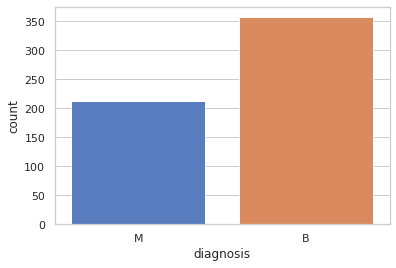

In [0]:
ax = sns.countplot(df.diagnosis,label="Count")
print(df['diagnosis'].value_counts())

**Drop columns**

We drop the "id" column as it does not contain information valuable in this analysis. The "unnamed 32" column is also dropped due to lack of knowledge of the column, we do not know what it represents. 


In [0]:
#drop the unneccessary columns 
df.drop('id',axis=1,inplace=True)
df.drop('Unnamed: 32',axis=1,inplace=True)

In [0]:
df.shape

(569, 31)

So know we have 569 datapoints and 31 variables. 

**Check for NaN values**

Lets see if we have do remove/manipualte any rows based on NaN values

In [0]:
#check for NaN value 
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

luckily we have no NaNs

**Map target variable**


Lets map the target variable, "diagnosis", such that is binary with 1 and 0 instead of M and B. 

In [0]:
#change to 1 and 0 instead of Maliginent and beningn 
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})

**Description of varaibles**


Now we will have a look at the different variables and their mean, std, and so on. 

In [0]:
df.describe()

diagnosis  radius_mean  ...  symmetry_worst  fractal_dimension_worst
count  569.000000   569.000000  ...      569.000000               569.000000
mean     0.372583    14.127292  ...        0.290076                 0.083946
std      0.483918     3.524049  ...        0.061867                 0.018061
min      0.000000     6.981000  ...        0.156500                 0.055040
25%      0.000000    11.700000  ...        0.250400                 0.071460
50%      0.000000    13.370000  ...        0.282200                 0.080040
75%      1.000000    15.780000  ...        0.317900                 0.092080
max      1.000000    28.110000  ...        0.663800                 0.207500

[8 rows x 31 columns]

**Extract features and target**

We create a dataframe with only the features and the target repspectivly, so we can do further analysis on the features seperatly.

In [0]:
df_features = df.iloc[:,1:31] #all features 
df_target = df.iloc[:,0:1] #the target 

**List different types of features**

As their are 31 features to analys, we can group them based on the characteristics such as if they are based on; mean;, se; or worst 

In [0]:
#list of column names that match with Mean
mean_cols = [col for col in df_features.columns if '_mean' in col]
#list of column names that match with SD
se_cols = [col for col in df_features.columns if '_se' in col]
#list of column names that match with Mean
worst_cols = [col for col in df_features.columns if '_worst' in col]

## Boxplot of features

**Boxplot of mean features**

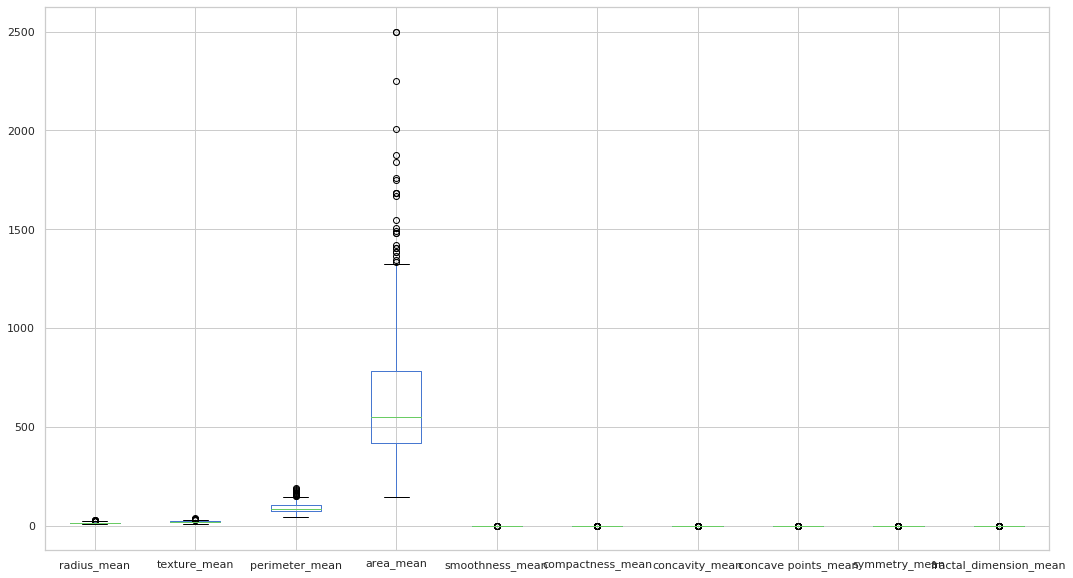

In [0]:
#plot all features that are based on "mean"
plot_dims = (18, 10)
plt_mean = df_features.boxplot(figsize = plot_dims, column=mean_cols)

**Boxplot of se features**

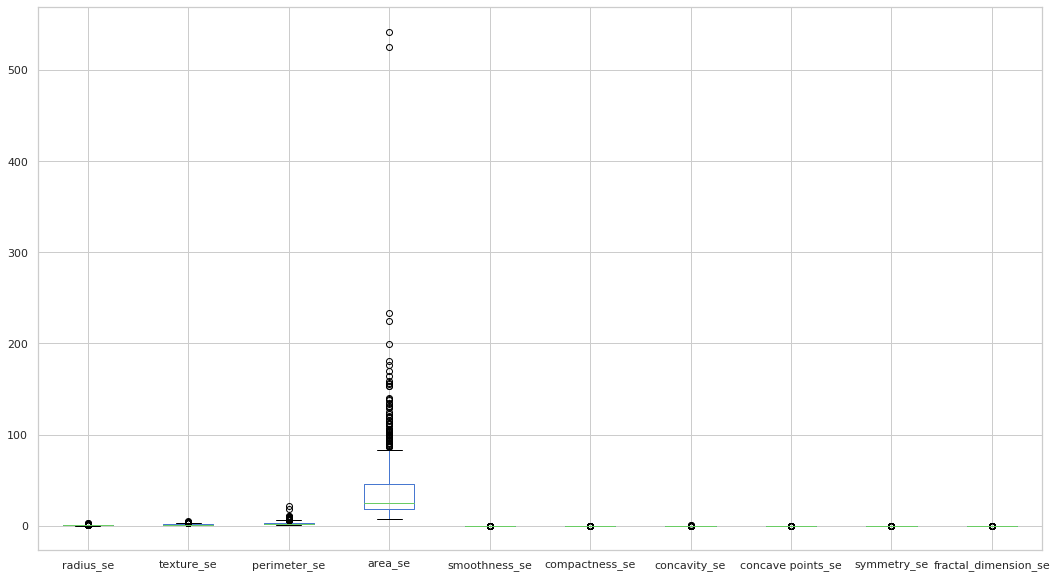

In [0]:
#plot all features that are based on "se"
plot_dims = (18, 10)
plt_se = df_features.boxplot(figsize = plot_dims, column =se_cols)

**Boxplot of worst features**

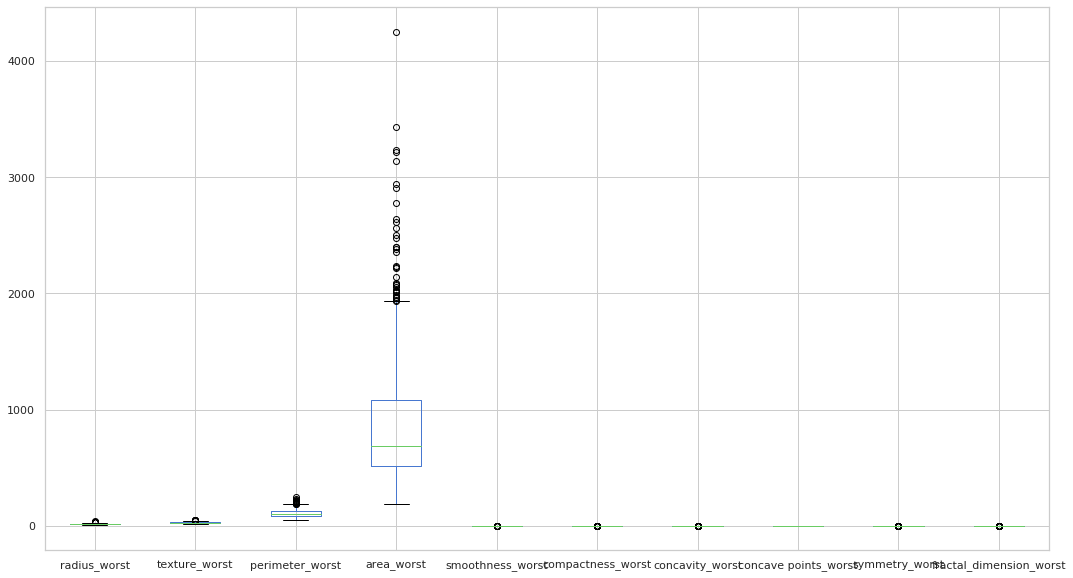

In [0]:
#plot all features that are based on "worst"
plot_dims = (18, 10)
plt_worst = df_features.boxplot(figsize = plot_dims, column =worst_cols)

As we can see, the columns with "area" are numerically larger than the other features. Therefore it could be useful to normalize the data. 

## Data Normalization

In [0]:
df_features_normal= (df_features - df_features.mean()) / (df_features.std())   # standardization of all features
df_normal = pd.concat([df_target,df_features_normal],axis=1)


## Pairplot of all normalized features

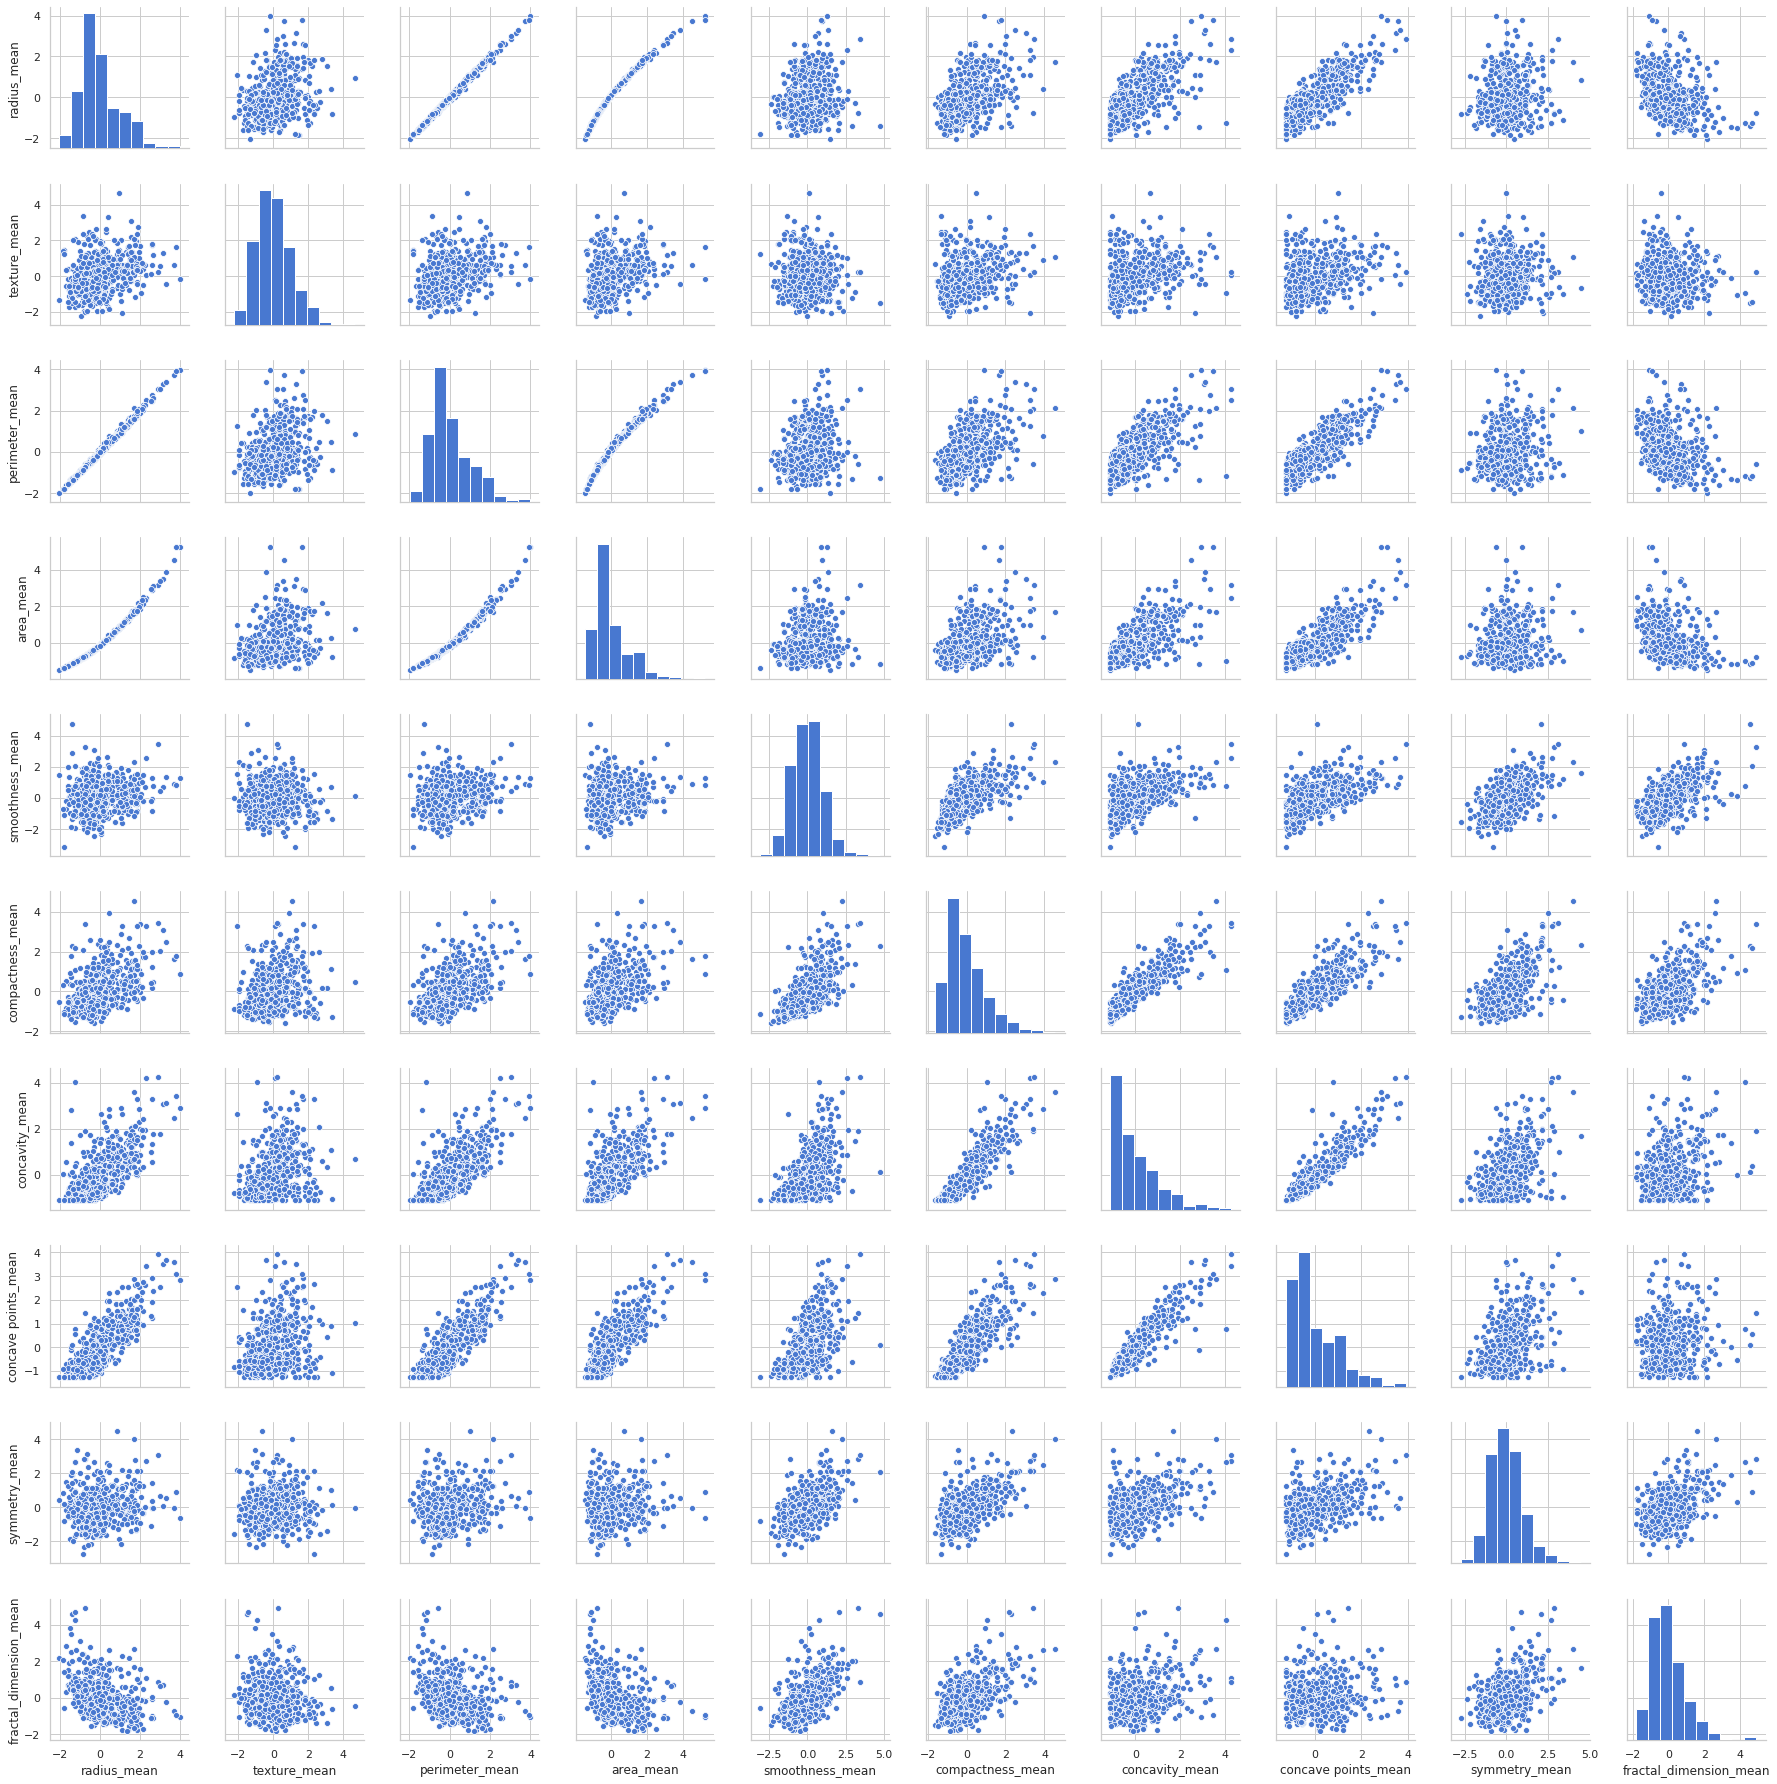

In [0]:
sns.pairplot(df_normal[mean_cols]);

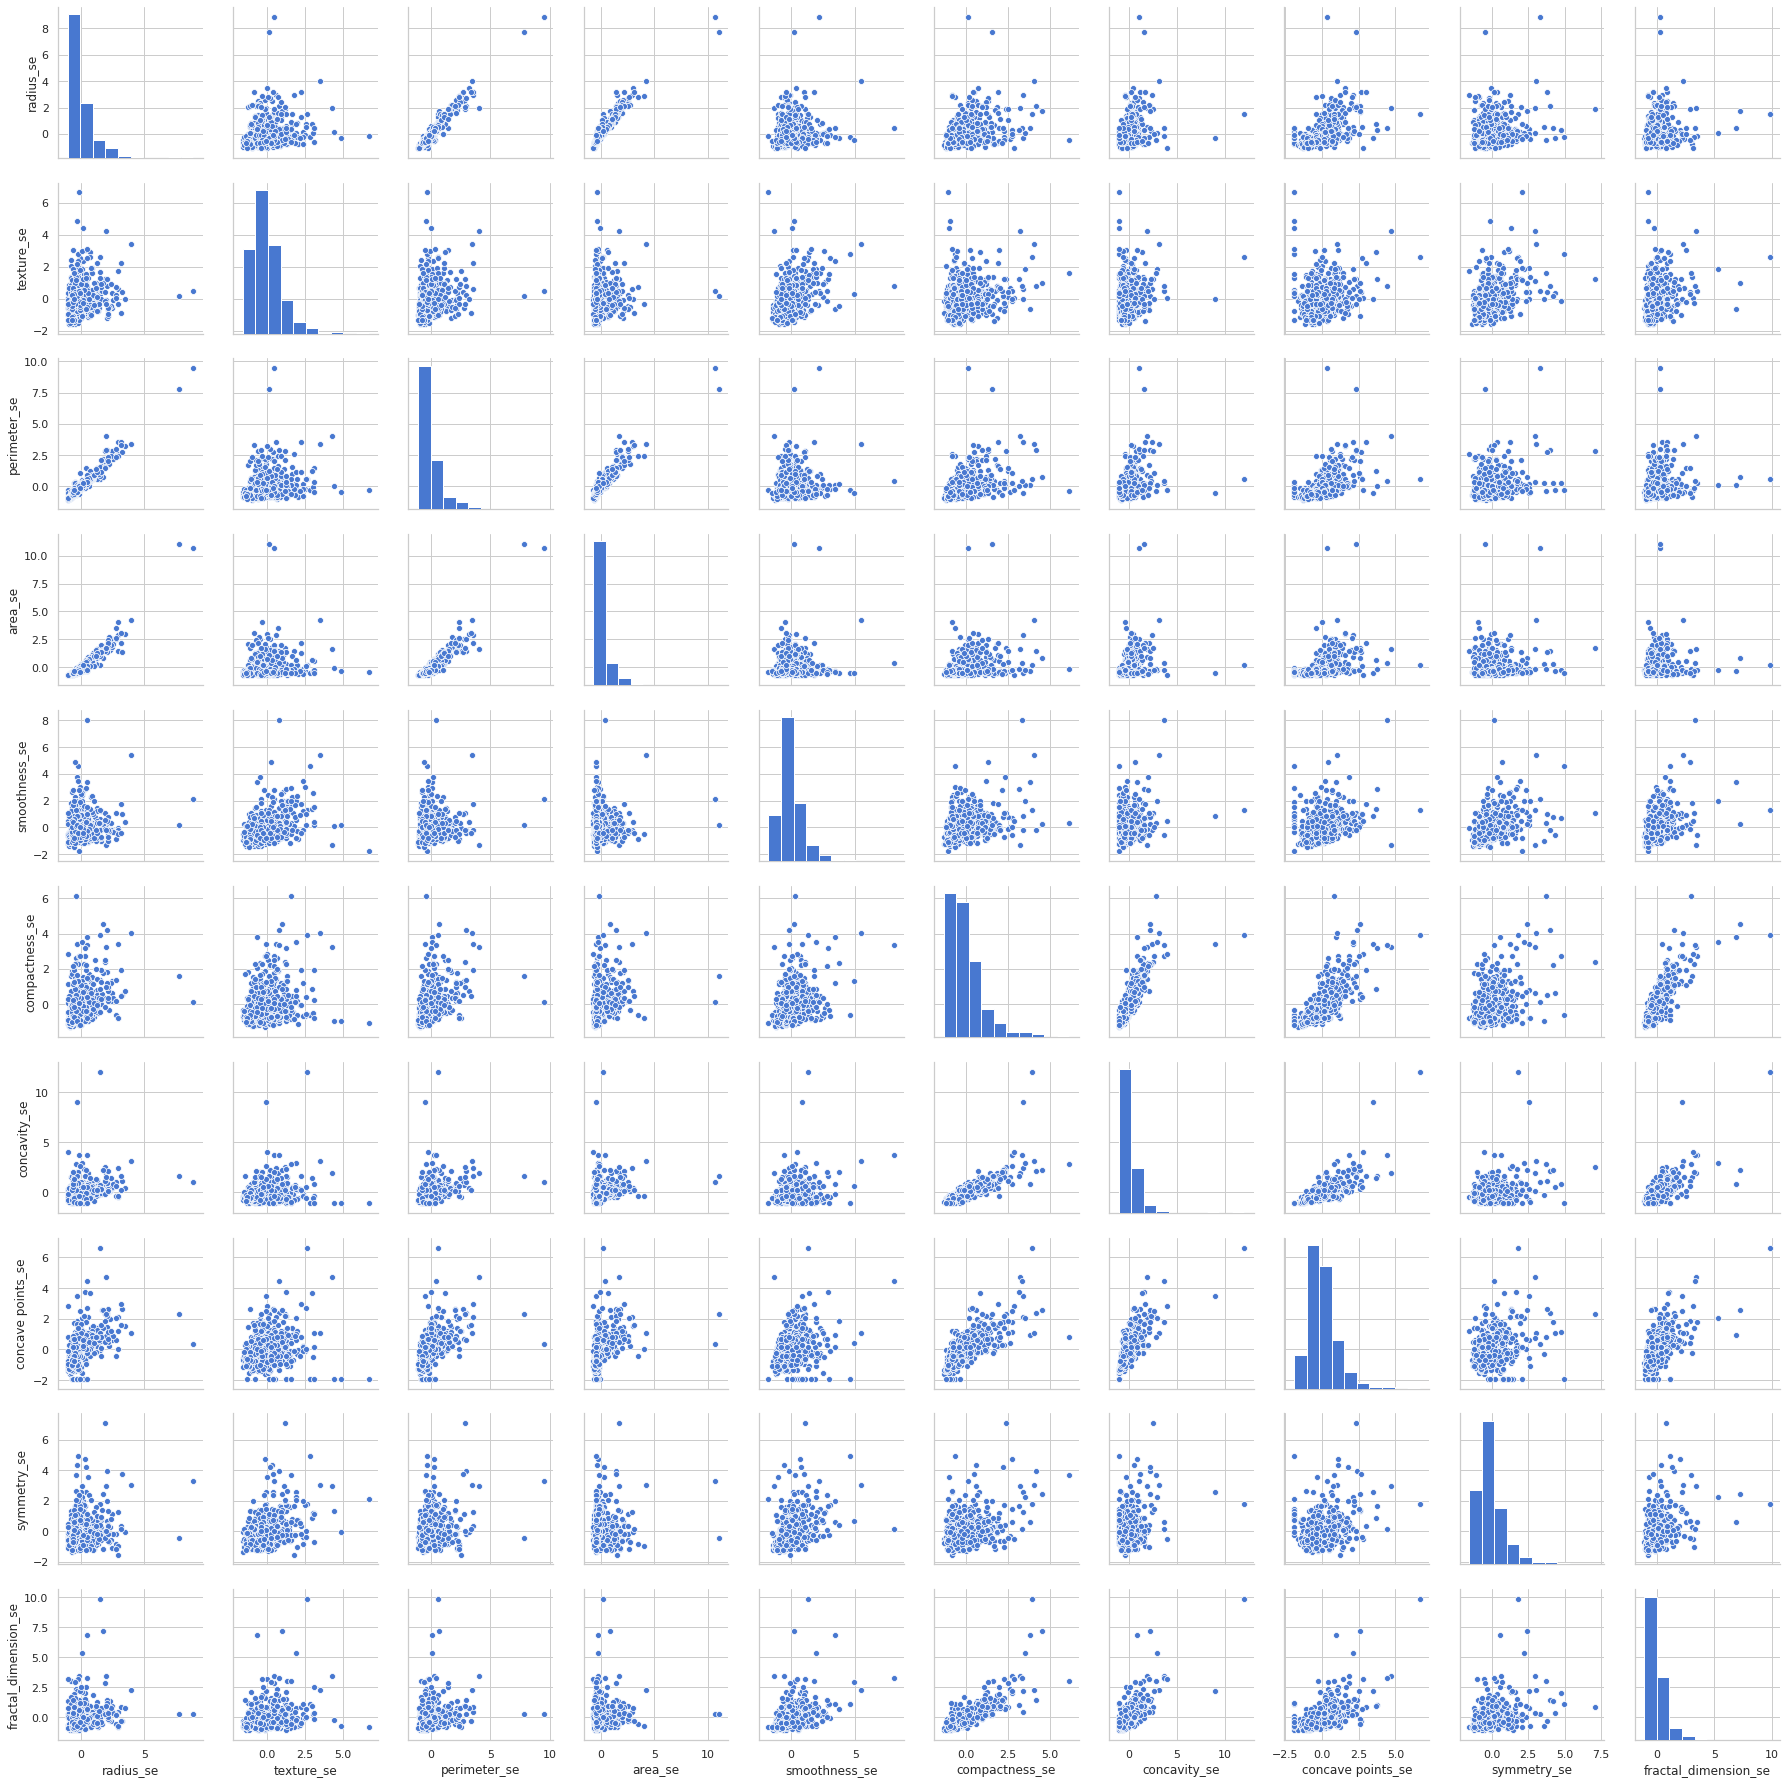

In [0]:
sns.pairplot(df_normal[se_cols]);

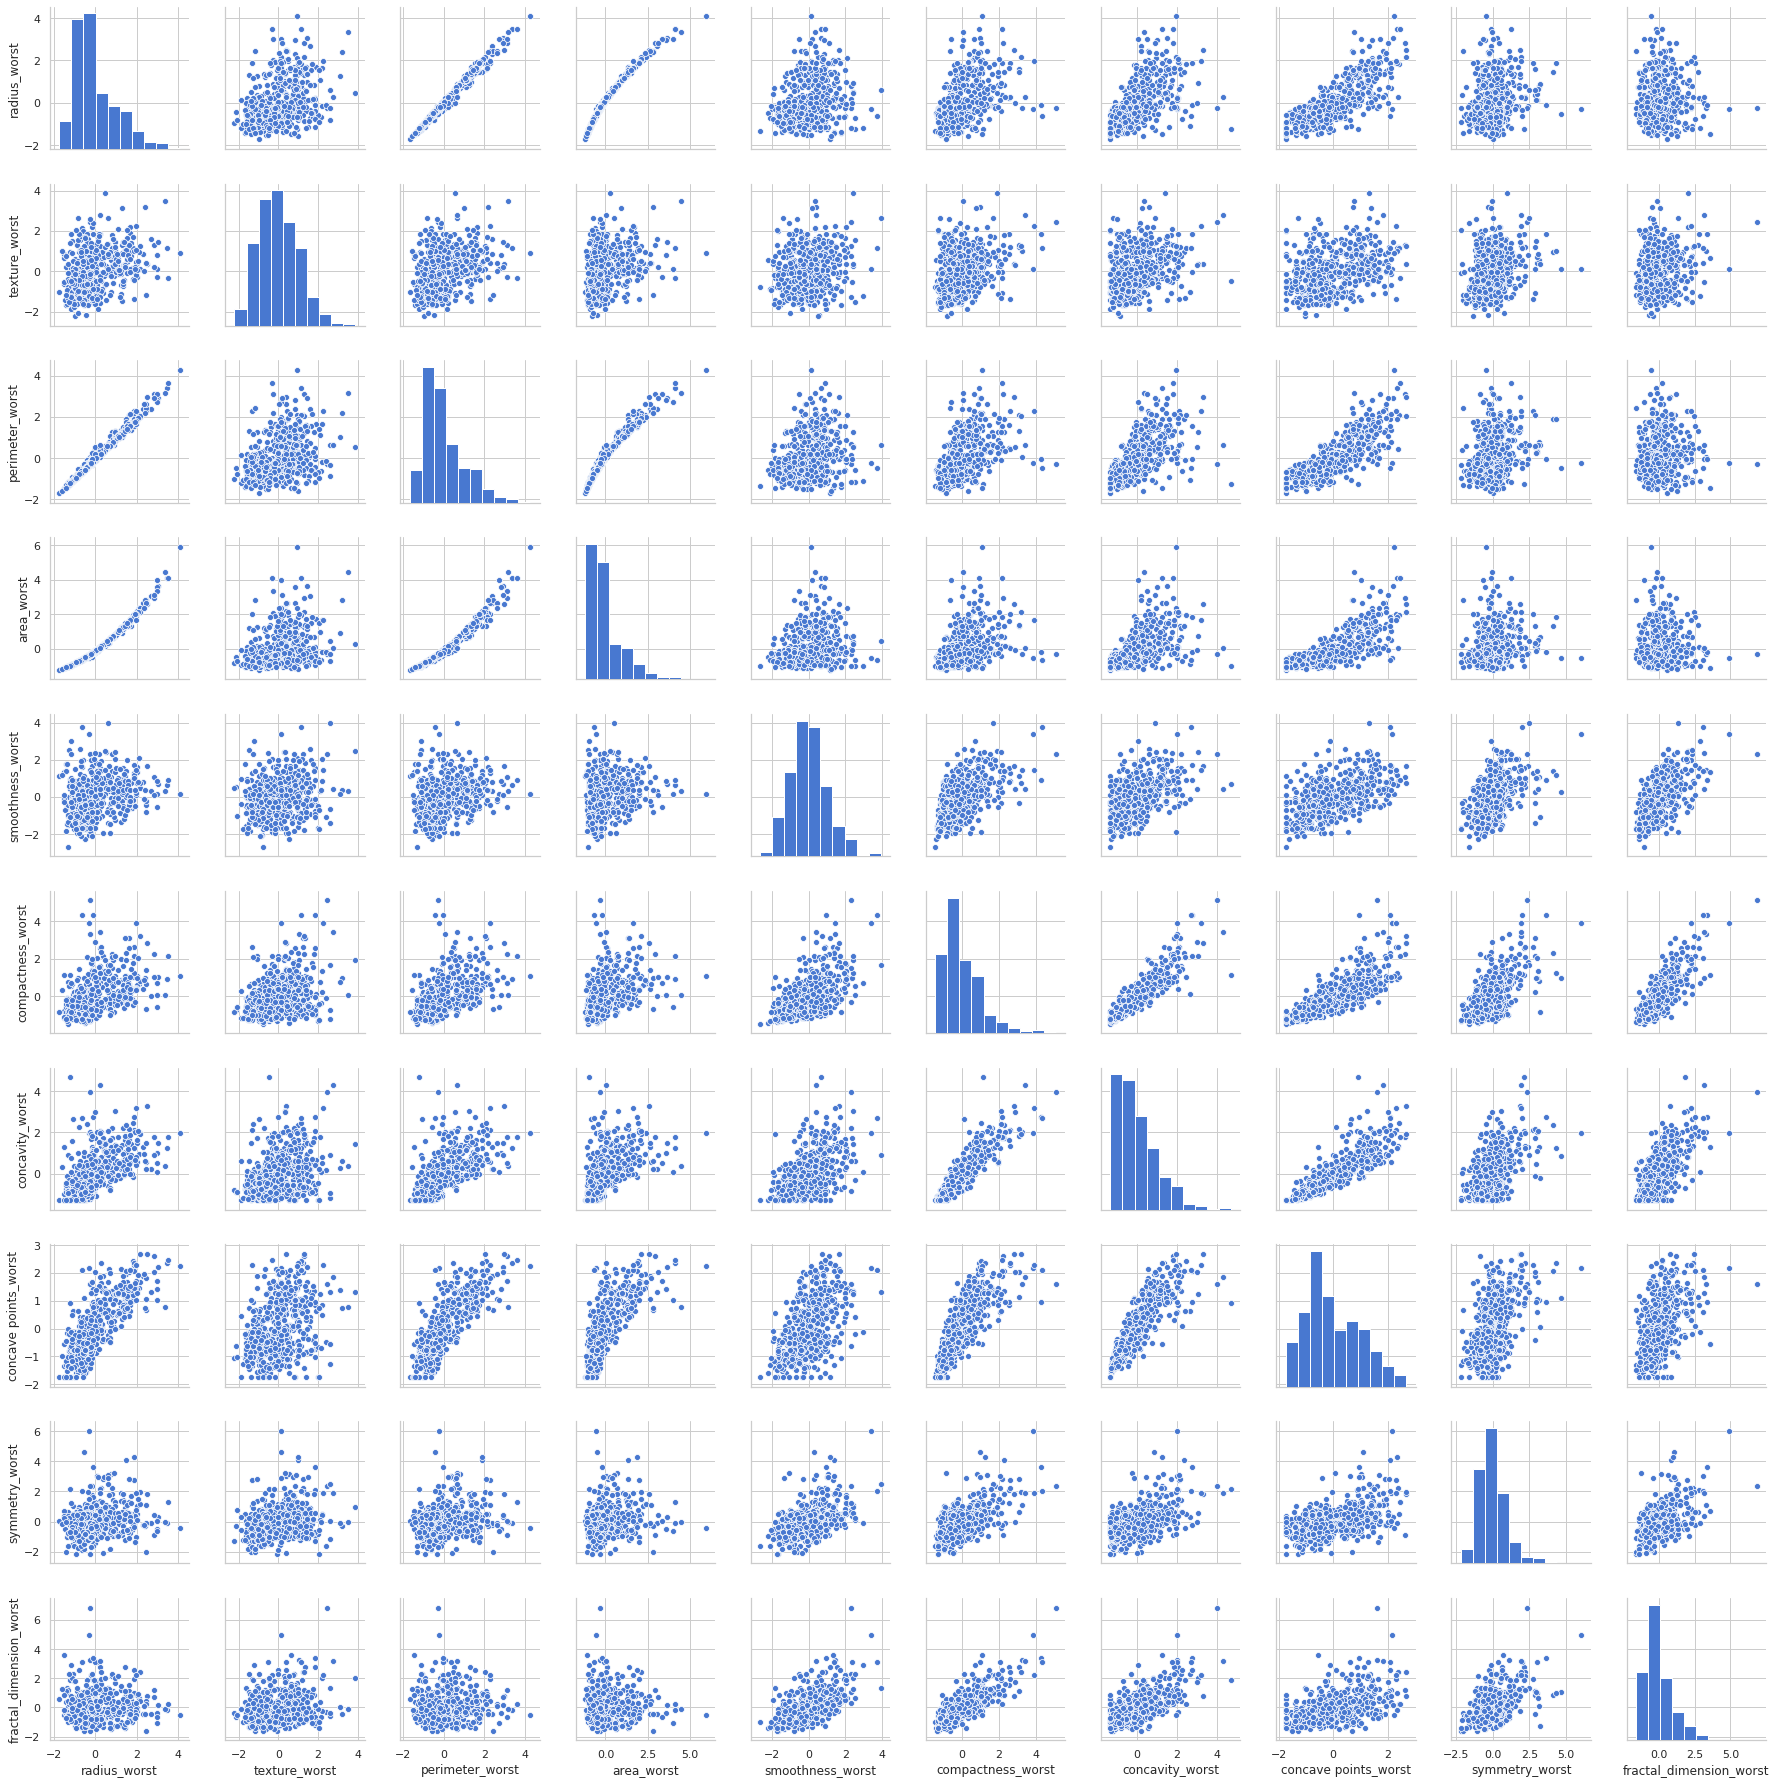

In [0]:
sns.pairplot(df_normal[worst_cols]);

## Violin and Swarm plots for all features


With the violin + swarm plot it is easy to see how the data is distributed, but also to get a initial understanding of how some features could be related to the diagnosis. For example, the "radius worst" feature clearly indicated a relationship to the diagnosis. 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

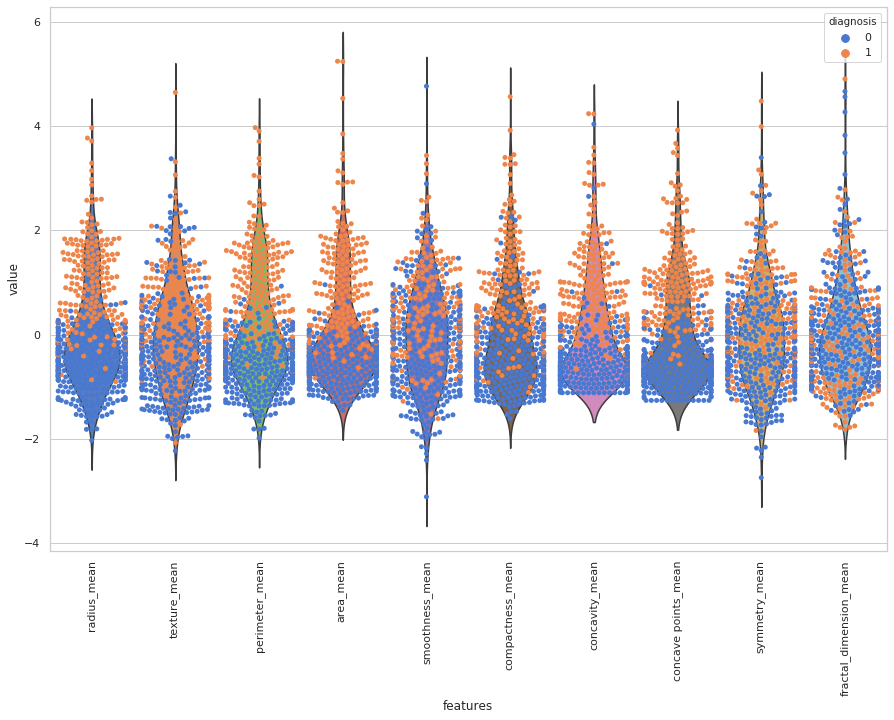

In [0]:
sns.set(style="whitegrid", palette="muted")
data = pd.concat([df_target,df_features_normal[mean_cols]],axis=1) # concat data to form new
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(15,10))
import time
tic = time.time()
ax = sns.violinplot(x="features", y="value", data=data, inner=None)
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data) 

plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

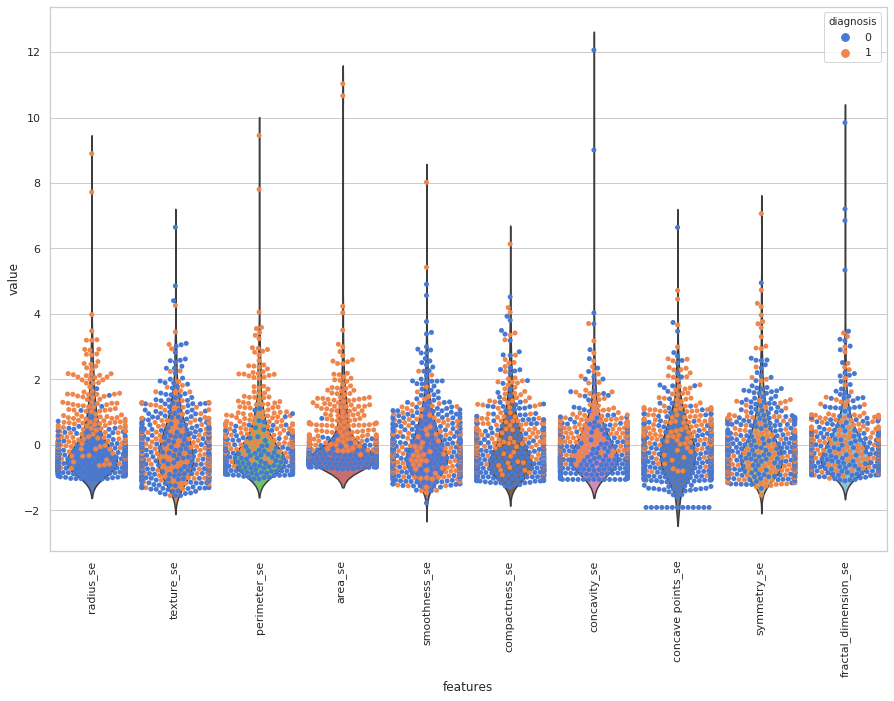

In [0]:
sns.set(style="whitegrid", palette="muted")
data = pd.concat([df_target,df_features_normal[se_cols]],axis=1) # concat data to form new
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(15,10))
import time
tic = time.time()
ax = sns.violinplot(x="features", y="value", data=data, inner=None)
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data) 

plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

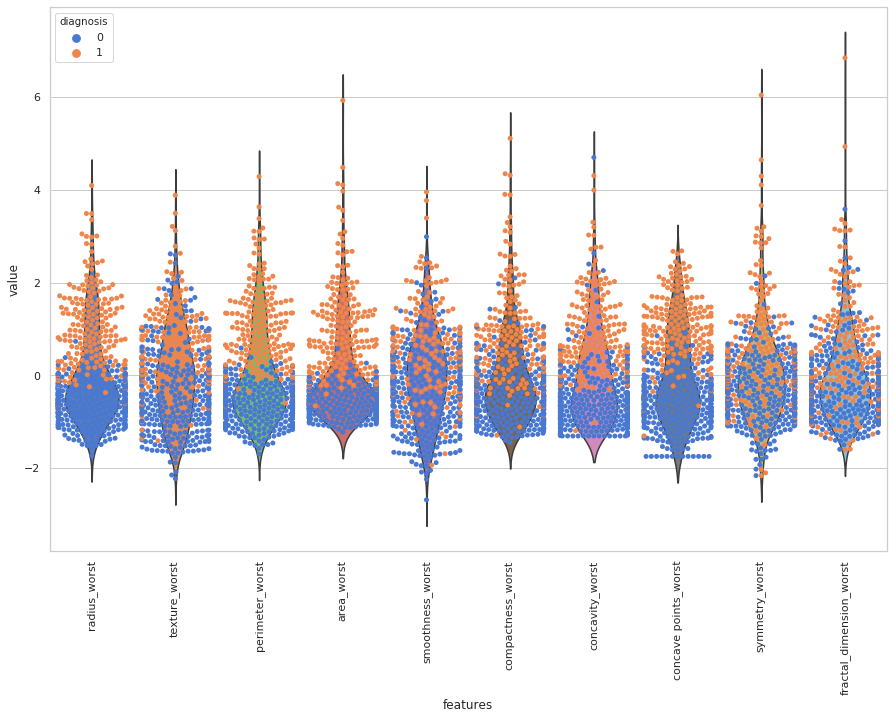

In [0]:
sns.set(style="whitegrid", palette="muted")
data = pd.concat([df_target,df_features_normal[worst_cols]],axis=1) # concat data to form new
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(15,10))
import time
tic = time.time()
ax = sns.violinplot(x="features", y="value", data=data, inner=None)
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data) 

plt.xticks(rotation=90)

## Correlations

With the correlation plot we can easily get an understanding ofhow variables are associated. Thus, we can get an initial idea or understanding of which features could be of most importance. Furthermore, the correlation analysis could also be used later for feature selection, removing features with a large correlation between them. 

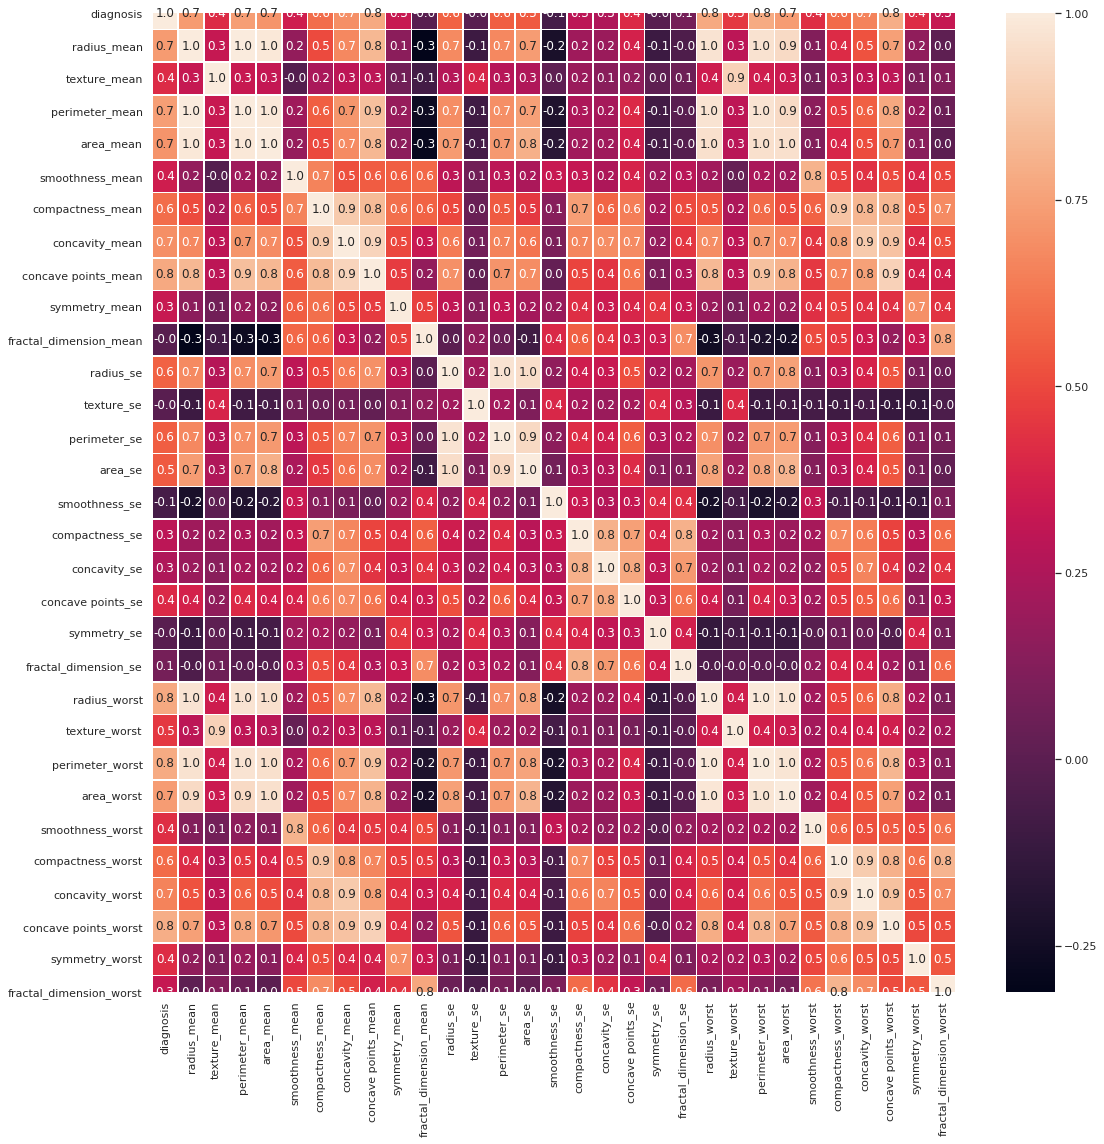

In [0]:
#Using Pearson Correlation
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df_normal.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

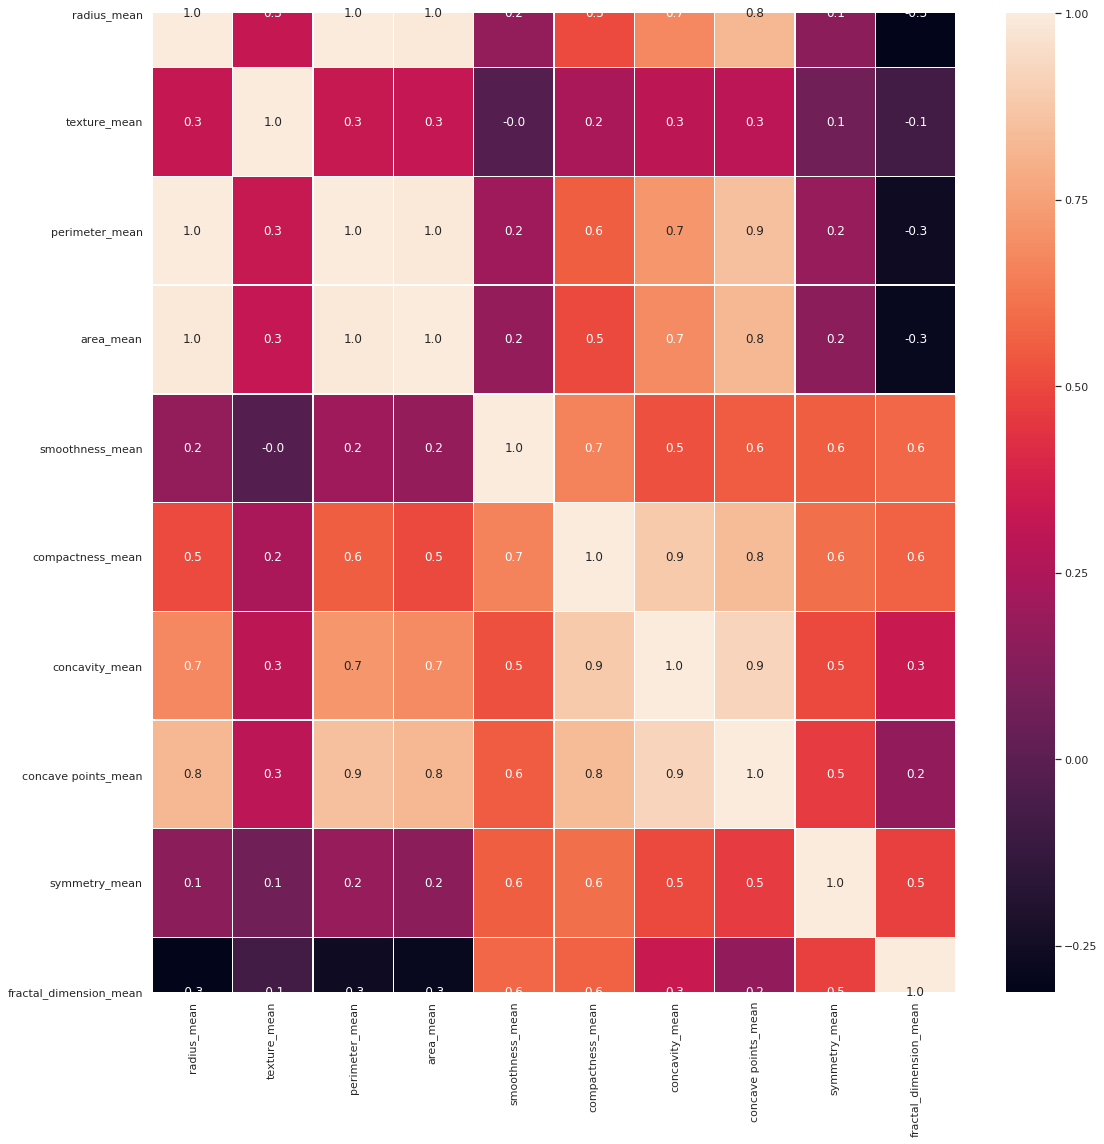

In [0]:
#Using Pearson Correlation
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df_normal[mean_cols].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

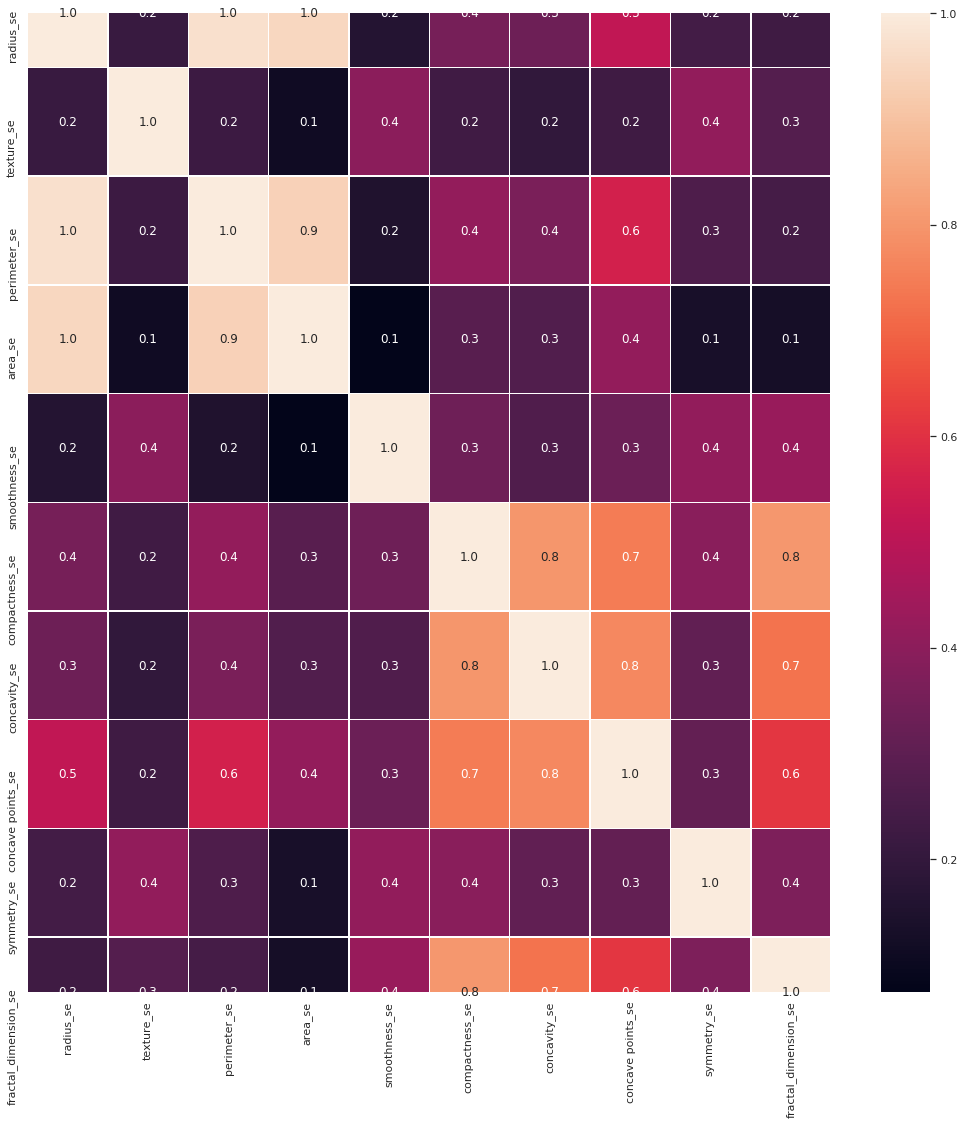

In [0]:
#Using Pearson Correlation
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df_normal[se_cols].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

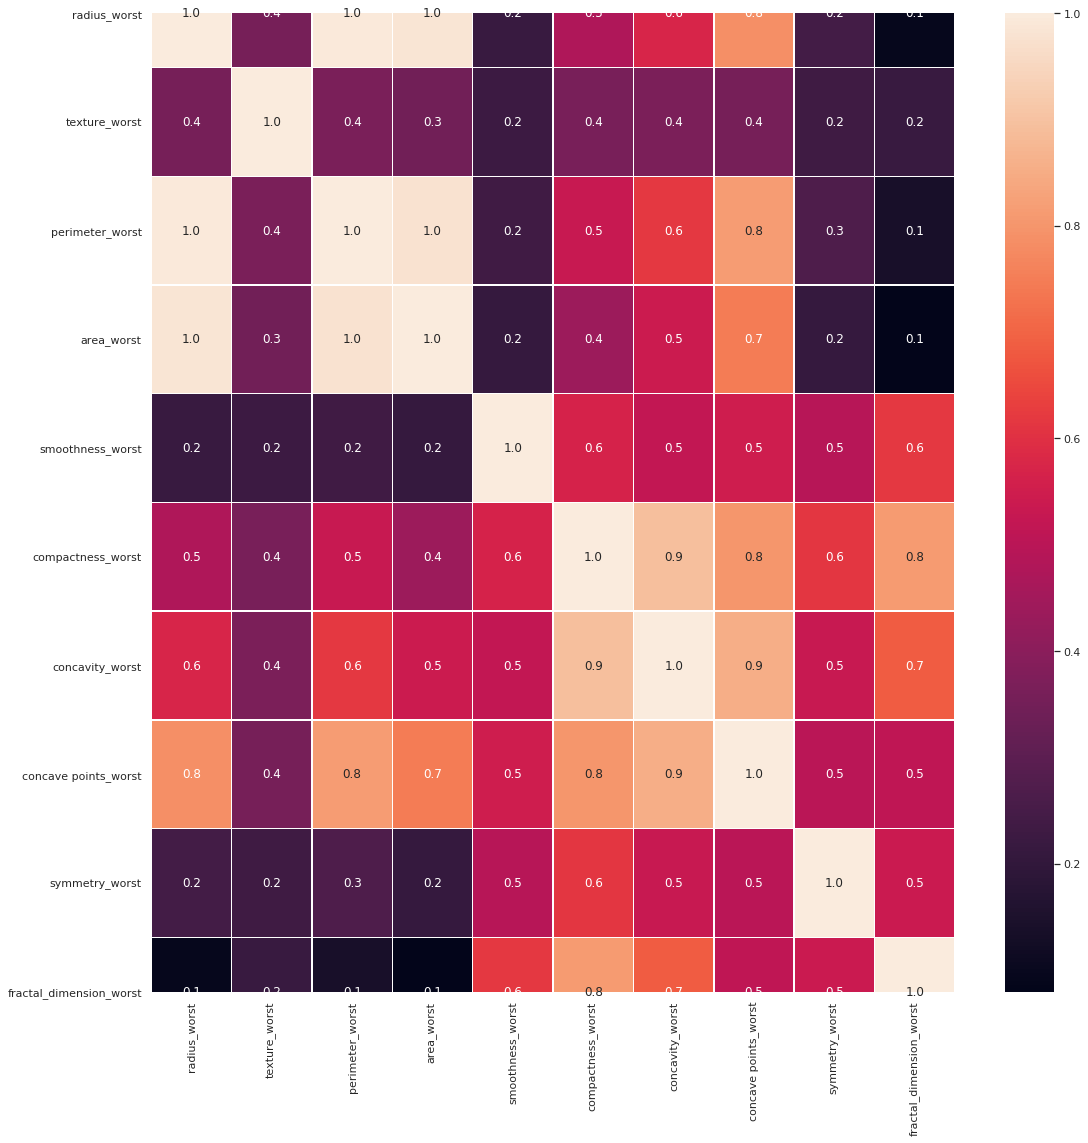

In [0]:
#Using Pearson Correlation
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df_normal[worst_cols].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

# Outlier removal
Based on the EDA, we have some datapoints that could be removed.

In [0]:
from scipy import stats
#df_no_outliers  = df_normal[(np.abs(stats.zscore(df_normal)) < 3).all(axis=1)]


# Dimensionality reduction

- Correlation
- RFE
- PCA 



Lets perform 3 different methods of dimensionality reducation and we can evaluate this methods in a later stage when a predictive model is implemented. The first one, correlation is intuitiv and done by hand based on the EDA. The RFE is also intutiv and easy to understand, but less eady to do by hand. The PCA is nor necessarly a feature selection approach in the common sense, but instead linearly transforms the dataset to less features by tries to contain as much information as possible. 

I think these three different methods will be plenty and will serve as a good starting place. 

## Correlation
We used the correlations matricies in the EDA to remove features that are correlated with each other. This is done by hand. 

In [0]:
drop_col = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
df_features_normal_correlation = df_features_normal.drop(drop_col,axis = 1 )         
df_features_normal_correlation.head()


texture_mean  area_mean  ...  symmetry_worst  fractal_dimension_worst
0     -2.071512   0.983510  ...        2.748204                 1.935312
1     -0.353322   1.907030  ...       -0.243675                 0.280943
2      0.455786   1.557513  ...        1.151242                 0.201214
3      0.253509  -0.763792  ...        6.040726                 4.930672
4     -1.150804   1.824624  ...       -0.867590                -0.396751

[5 rows x 16 columns]

With the correlation method we ended up with 16 features that will be used. 

## RFE 

In [0]:
#no of features
from sklearn.svm import SVR
from sklearn.feature_selection import RFE
nof_list=np.arange(1,20)            
#Variable to store the optimum features
ascore_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(df_features_normal,df_target.diagnosis, test_size = 0.3, random_state = 0)
    model = SVR(kernel="linear")
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)

  


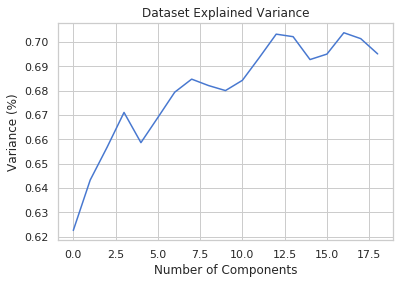

In [0]:
plt.figure()
plt.plot(score_list)
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Dataset Explained Variance')
plt.show()

Lets go for three models; one with 3 componenets, one with 7 components, and one with 11 componenets based on RFE.

In [0]:
model = SVR(kernel="linear")
rfe = RFE(model,3)
df_features_normal_RFE3 = rfe.fit_transform(df_features_normal,df_target.diagnosis)

rfe = RFE(model,7)
df_features_normal_RFE7 = rfe.fit_transform(df_features_normal,df_target.diagnosis)

rfe = RFE(model,11)
df_features_normal_RFE11 = rfe.fit_transform(df_features_normal,df_target.diagnosis)

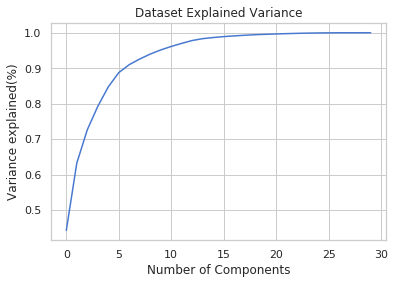

In [0]:
#Fitting the PCA algorithm with our Data
from sklearn.decomposition import PCA

pca = PCA().fit(df_features_normal)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance explained(%)') #for each component
plt.title('Dataset Explained Variance')
plt.show()

In [0]:
pca = PCA(n_components=5)
pca.fit(df_features_normal)
features_normal_PCA= pca.transform(df_features_normal)

In [0]:
#trafnsorm the numpy array to datafram 
df_features_normal_PCA = pd.DataFrame({'Column1': features_normal_PCA[:, 0], 'Column2': features_normal_PCA[:, 1], 'Column3': features_normal_PCA[:, 2], 'Column4': features_normal_PCA[:, 3], 'Column5': features_normal_PCA[:, 4]})


Seems like 5 components would be best based on the elbow method mainly used for knn. 

In [0]:
list_feature_selection_df = [df_features_normal_correlation,df_features_normal_RFE3,df_features_normal_RFE7,df_features_normal_RFE11,df_features_normal_PCA]

In [0]:
dict_feature_selection_df = {'correlation' : df_features_normal_correlation, 'RFE3' : df_features_normal_RFE3, 'RFE7' : df_features_normal_RFE7, 'RFE11' :  df_features_normal_RFE11, 'PCA' : df_features_normal_PCA }

# Supervised Learning

We will analyze 4 different subsets of the data. The full dataset, the dataset with PCA,  RFE3, and RFE7 

In [0]:
#libraries we need for the supervised learning
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier  


In [0]:
import warnings # remove warnings 
warnings.simplefilter(action='ignore', category=FutureWarning)

## Predictive models 

F1 score is a score which has the balance between the precision and the recall. As false negatives could be considered more harmful than false positives, having a performance metric that incorporated the recall is necessary. However, we should not only focus on recall as a false positiv would cost resources and could thus affect the quality of care for other patients whom "actually" need help.  


We will evaluate 3 models, 2 machine learning models and one deep learning model. 

In [0]:
#Here we can import the multiple regresison model we would like to analyze. 
#Uses cross validation. Presumably 3-5 fold would be good

rf = RandomForestClassifier( random_state = 42)
xgb = XGBClassifier(seed=42)
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=42)

dict_scores = {}

print('4-fold cross validation:\n')
for name,set_features in dict_feature_selection_df.items():
  print(name)
  dict_models = {}
  for clf, label in zip([xgb,rf,mlp], 
                        [ 
                        'xgb',
                        'rf',
                         'mlp'
                        ]):
      scores = model_selection.cross_val_score(clf, set_features, df_target.diagnosis, 
                                                cv=4, scoring = 'f1')
      dict_models[label] = scores.mean()
      dict_scores[name] = dict_models

      print("f1: %0.3f (+/- %0.2f) [%s]" 
            % (scores.mean(), scores.std(), label))

4-fold cross validation:

correlation
f1: 0.965 (+/- 0.02) [xgb]
f1: 0.939 (+/- 0.02) [rf]
f1: 0.943 (+/- 0.03) [mlp]
RFE3
f1: 0.875 (+/- 0.03) [xgb]
f1: 0.860 (+/- 0.02) [rf]
f1: 0.898 (+/- 0.01) [mlp]
RFE7
f1: 0.925 (+/- 0.02) [xgb]
f1: 0.917 (+/- 0.03) [rf]
f1: 0.920 (+/- 0.03) [mlp]
RFE11
f1: 0.927 (+/- 0.02) [xgb]
f1: 0.910 (+/- 0.02) [rf]
f1: 0.945 (+/- 0.02) [mlp]
PCA
f1: 0.939 (+/- 0.02) [xgb]
f1: 0.932 (+/- 0.02) [rf]
f1: 0.929 (+/- 0.03) [mlp]


## Results 

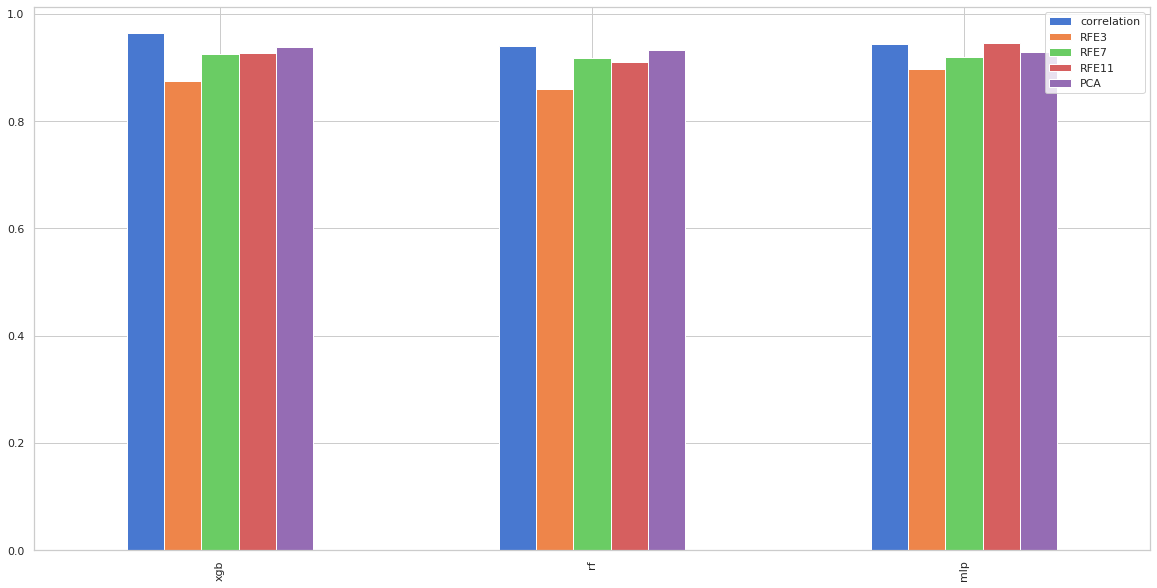

In [0]:
plt.rcParams["figure.figsize"] = (20,10)

pd.DataFrame(dict_scores).plot(kind='bar')
plt.show()

The best model is the xgb model based on the feature selection which is based on the correlation. However, as the models are all good and are all nearly the same other criterions should be of value. For example, the randomforests model based on the RFE7 subset only contains 7 different features which makes it easy to use and, presumably, less demanding if actually implemented in the healthcare industry. Even the RFE3 model predicts fairly well. This could then be used as a pre-screening method to remove the ones that with a high probability does not have bening cancer. 